# MUC4 proteomics cis comparison

MUC4 is a mucin that shows changed behavior in many cancers, like breast, stomach, and pancreatic (https://www.ncbi.nlm.nih.gov/pubmed/23495864). MUC4 is frequently mutated (greater than twenty percent of total tumor samples) in the ovarian and colon datasets. This notebook will look at the transcriptomics for MUC4 in ovarian and colon cancer.

## Step 1: Library Imports

Run this cell to import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import sys 
sys.path.append('C:\\Users\\brittany henderson\\GitHub\\WhenMutationsMatter\\Brittany\\')
import functions as f

import cptac
import cptac.algorithms as al

## Step 2: Find the frequently mutated genes for Ovarian Cancer

Enter the type of cancer and the cutoff for mutation frequency that you would like to use.

In [20]:
ov_object = cptac.Ovarian()
desired_cutoff = .1

ov_freq_mut = al.get_frequently_mutated(en_object, cutoff=desired_cutoff)
print('\n\nNumber of Frequently Mutated Genes:', len(ov_freq_mut), '\n', ov_freq_mut.head())

                                    

Number of Frequently Mutated Genes: 232 
      Gene  Unique_Samples_Mut  Missence_Mut  Truncation_Mut
0  ABCA12            0.147368      0.094737        0.073684
1  ABCA13            0.115789      0.105263        0.042105
2  ACVR2A            0.105263      0.010526        0.094737
3  ADGRG4            0.136842      0.126316        0.021053
4  ADGRV1            0.115789      0.094737        0.052632


## Step 3: Select MUC4, a frequently mutated gene

In [5]:
gene = 'MUC4'

## Step 4: Select desired omics comparison

Select which type of omics you want to compare. If you want to compare proteomics data for the interacting proteins, uncomment the "omics = en.get_proteomics()" line, etc.

In [3]:
omics = en_object.get_proteomics()

## Step 5: cis comparison 

Determine if the DNA mutation has an effect on the omics measurement. In order to do this, we have a few steps in code. These steps are found in the format_cis_comparison_data function.
1. get a table with both the omics and mutation data for tumors
2. get a binary column from the mutation data to separate our samples
3. format data frame to be used in the T-test
4. send data to the T-test.

The format_cis_comparison_data does the first 3 steps.

In [21]:
ov_status = f.format_cis_comparison_data(ov_object, omics, 'proteomics', gene)
ov_status.head()

,MUC4_proteomics,binary_mutations
Sample_ID,,
S009,-0.827428,Wildtype
S013,-0.149857,Wildtype
S019,2.395552,Mutated
S026,-0.962174,Wildtype
S027,-0.874061,Wildtype


In [24]:
omics_col_list = ['MUC4_proteomics']
prot_col = gene+'_proteomics'

# Step 4 - T-test comparing means of mutated vs wildtype effect on cis omics
print("Doing t-test comparison\n")
significant_pval_results = al.wrap_ttest(ov_status, 'binary_mutations', omics_col_list)
print(significant_pval_results)

Doing t-test comparison

No significant comparisons.
None


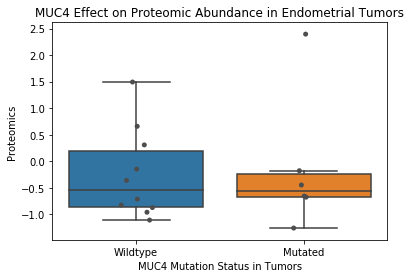

In [27]:
# Step 5 - Create boxplt to compare wildtype and mutated effect on omics data
en_cis_boxplot = sns.boxplot(data = ov_status, x = 'binary_mutations',
                          y = prot_col, order = ["Wildtype","Mutated"], showfliers = False)  
en_cis_boxplot.set_title(gene + " Effect on Proteomic Abundance in Endometrial Tumors")
en_cis_boxplot = sns.stripplot(data= ov_status, x = 'binary_mutations',
                            y = prot_col, jitter = True, color = ".3", order = ["Wildtype","Mutated"])
en_cis_boxplot.set(xlabel = gene + " Mutation Status in Tumors", ylabel = "Proteomics")
plt.show()

In [31]:
ov_type = f.get_missence_truncation_comparison(ov_object, omics, 'proteomics', gene)

print("Doing t-test comparison for mutation type\n")
significant_pval_results = al.wrap_ttest(ov_type, 'binary_mutations', omics_col_list)
print(significant_pval_results)

Doing t-test comparison for mutation type

No significant comparisons.
None


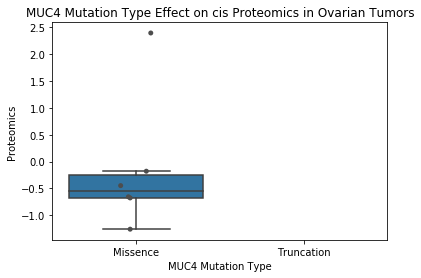

In [30]:
ov_cis_boxplot = sns.boxplot(data = ov_type, x = 'binary_mutations',
                          y = prot_col, order = ["Missence","Truncation"], showfliers = False)  
ov_cis_boxplot.set_title(gene + " Mutation Type Effect on cis Proteomics in Ovarian Tumors")
ov_cis_boxplot = sns.stripplot(data= ov_type, x = 'binary_mutations',
                            y = prot_col, jitter = True, color = ".3", order = ["Missence","Truncation"])
ov_cis_boxplot.set(xlabel = gene + " Mutation Type", ylabel = 'Proteomics')
plt.show()

# Repeat with the Colon dataset

Go through the same process, this time using the Colon dataset. We will only print five genes from the frequently mutated data frame for simplicity.

In [7]:
colon_object = cptac.Colon()
desired_cutoff = .1

colon_freq_mut = al.get_frequently_mutated(colon_object, cutoff=desired_cutoff)
print('\n\nNumber of Frequently Mutated Genes:', len(colon_freq_mut), '\n', colon_freq_mut.head())

                                    

Number of Frequently Mutated Genes: 612 
      Gene  Unique_Samples_Mut  Missence_Mut  Truncation_Mut
0  ABCA13            0.195876      0.164948        0.103093
1   ABCA2            0.175258      0.164948        0.030928
2   ABCA4            0.144330      0.082474        0.061856
3   ABCB4            0.134021      0.061856        0.072165
4   ABCB6            0.103093      0.061856        0.041237


In [15]:
gene = 'MUC4'
omics_col_list = ['MUC4_proteomics']
prot_col = gene+'_proteomics'

co_omics = colon_object.get_proteomics()

In [16]:
co_status = f.format_cis_comparison_data(colon_object, co_omics, 'proteomics', gene)
#co_data_for_comparison.head()

print("Doing t-test comparison\n")
significant_pval_results = al.wrap_ttest(co_status, 'binary_mutations', omics_col_list)
print(significant_pval_results)

Doing t-test comparison

        Comparison  P_Value
0  MUC4_proteomics   0.0235


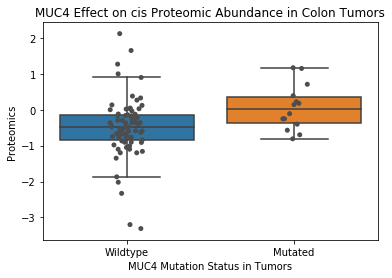

In [17]:
cis_boxplot = sns.boxplot(data = co_status, x = 'binary_mutations',
                          y = prot_col, order = ["Wildtype","Mutated"], showfliers = False)  
cis_boxplot.set_title(gene + " Effect on cis Proteomic Abundance in Colon Tumors")
cis_boxplot = sns.stripplot(data = co_status, x = 'binary_mutations',
                            y = prot_col, jitter = True, color = ".3", 
                            order = ["Wildtype","Mutated"])
cis_boxplot.set(xlabel = gene + " Mutation Status in Tumors", ylabel = "Proteomics")
plt.show()

In [18]:
co_type = f.get_missence_truncation_comparison(colon_object, co_omics, 'proteomics', gene)

print("Doing t-test comparison for mutation type\n")
significant_pval_results = al.wrap_ttest(co_type, 'binary_mutations', omics_col_list)
print(significant_pval_results)

Doing t-test comparison for mutation type

No significant comparisons.
None


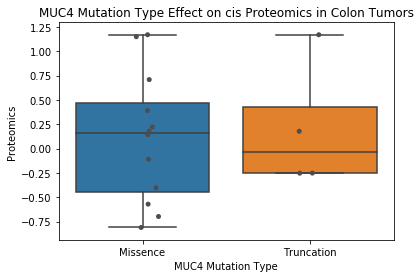

In [19]:
co_cis_boxplot = sns.boxplot(data = co_type, x = 'binary_mutations',
                          y = prot_col, order = ["Missence","Truncation"], showfliers = False)  
co_cis_boxplot.set_title(gene + " Mutation Type Effect on cis Proteomics in Colon Tumors")
co_cis_boxplot = sns.stripplot(data= co_type, x = 'binary_mutations',
                            y = prot_col,jitter = True, color = ".3", order = ["Missence","Truncation"])
co_cis_boxplot.set(xlabel = gene + " Mutation Type", ylabel = 'Proteomics')
plt.show()

# Visualize Pancancer effects

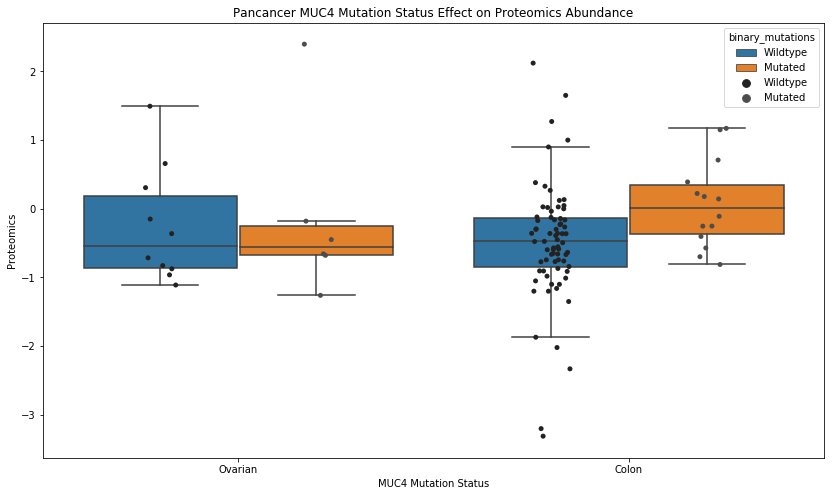

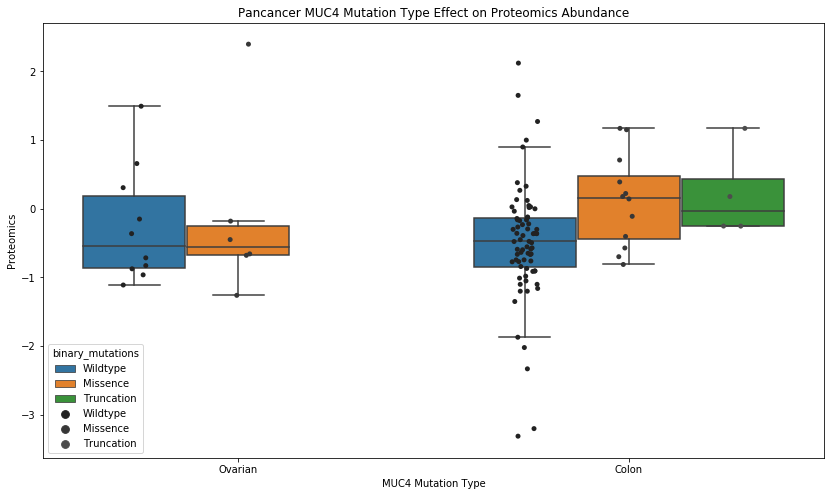

In [34]:
# Create a dataframe with pancancer data and labeling for mutation status (wildtype, mutated)
ov_mut_status = ov_status.assign(Cancer= 'Ovarian')
co_mut_status = co_status.assign(Cancer= 'Colon')
# mutation types (missence, truncation)
ov_mut_type = ov_type.assign(Cancer= 'Ovarian')
co_mut_type = co_type.assign(Cancer= 'Colon')

pancancer_data = pd.concat([ov_mut_status, co_mut_status, co_mut_type, ov_mut_type]) 
pancancer_df = pd.melt(pancancer_data, id_vars=['Cancer','binary_mutations'], value_name= 'Proteomics')  

# Visualize mutation status and categories accross cancers
plt.rcParams['figure.figsize']=(14,8) #size of plot
cis_status = sns.boxplot(
    x='Cancer', y="Proteomics", hue = 'binary_mutations', hue_order = ['Wildtype', 'Mutated'], data=pancancer_df, showfliers = False)    
cis_status.set_title('Pancancer ' + gene + " Mutation Status Effect on Proteomics Abundance")
cis_status = sns.stripplot(x='Cancer', y="Proteomics", hue = 'binary_mutations', data=pancancer_df,
                            jitter = True, color = ".3", hue_order = ['Wildtype', 'Mutated'], dodge = True)
cis_status.set(xlabel = gene + " Mutation Status", ylabel = 'Proteomics')
plt.show()

plt.clf()
plt.close()

cis_status = sns.boxplot(
    x='Cancer', y="Proteomics", hue = 'binary_mutations', hue_order = ['Wildtype', 'Missence', 'Truncation'], data = pancancer_df, showfliers = False)    
cis_status.set_title('Pancancer ' + gene + " Mutation Type Effect on Proteomics Abundance")
cis_status = sns.stripplot(x='Cancer', y="Proteomics", hue = 'binary_mutations', data = pancancer_df,
                            jitter = True, color = ".3", hue_order = ['Wildtype', 'Missence', 'Truncation'], dodge = True)
cis_status.set(xlabel = gene + " Mutation Type", ylabel = 'Proteomics')
plt.show()

plt.clf()
plt.close()

# Analysis of Results

The only significant test was colon mutation status. The mutated samples showed an increased abundance for MUC4 proteomics.